<a href="https://colab.research.google.com/github/hudada369/fy2020-repo-config/blob/master/Pytorch_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. 张量的简介与创建（张量及各种创建方式）；
2. 张量的基本操作（张量的切分，拼接，索引，变换，数学运算）；
3. 玩一个简单的线性回归模型；
4. 总结梳理。

概念：是多维数组，标量（0维张量），向量（1维度），矩阵的多维扩展
Variable 是 torch.autograd 中的数据类型，现在并入了tensor中
Tensor的属性包括：
1. data（被包装的 Tensor）, 
2. dtype（张量的数据类型，如 torch.FloatTensor，torch.cuda.FloatTensor，用的最多的一般是 float32 和 int64(torch.long)）, 
3. shape, （张量的形状，如 (64, 3, 224, 224)）
4. device(与数据有关)  
5. requires_grad, （指示是否需要梯度，有的不需要梯度）
6. grad, （data 的梯度）
7. grad_fn, （fn 表示 function 的意思，记录我么创建的创建张量时用到的方法，比如说加法、乘法，这个操作在求导过程需要用到，Tensor 的 Function，是自动求导的关键；）
8. is_leaf（指示是否是叶子节点（张量））


**创建方式：** size传入是括号的形式（3，3）矩阵 （3，）一维张量
1. 直接创建 torch.tensor(data,dtype = None,device = None,requeires_grad = False,pinmemory = False) data可以是list,也可以是numpy dtype 这个是指明数据类型，默认与 data 的一致。device 是指明所在的设备  注意：numpy转为tensor需要 torch.from_numpy(ndarry) tensor与原numpy 共享内存
2.  依据数值创建，依据size创建大小，torch.zeros(*size,out=None,layout=tensor.strides,device=None,requires_grad=False) layout 是在内粗你的布局形式 **out**是输出张量，将其赋值给另外一个张量，两个张量指向同一个内存
3. torch.zeros_like(input, dtype=None, layout=None, device=None, requires_grad=False)：这个是创建与 **input** 同形状的全 0 张量   torch.ones(), torch.ones_like()  # 没like就是输出，like的input是另外的张量，取它的形状
4. torch.full(size,full_value,剩下参数和上面一致) fill_value是要填充的值 torch.full_like()
5. torch.arange(start,end,step,out,dtype,layout,device,requeires_grad) 创建等差(左闭右开)的张量与numpy一样 
6. torch.linspace(参数中steps)：创建均分的 1 维张量， 数值区间 [start, end] 注意这里都是闭区间，和上面的区分 （steps不是步长，而是数列长度） (end-start) / (steps-1)
7. torch.logspace(base = 10) 对数均分数列 base应该是底数，剩下的参数和lin一样
8. torch.eye(n,m,out，剩余的参数和zeros一样)：创建单位对角矩阵，默认是方阵，n和m对应行数，列数
9. 依据概率分布创建张量 torch.normal(mean,std,sieze,out=None)：生成正态分布（高斯分布）， 这个使用的比较多,mean和std分别可以是标量或者张量，所以可以得到4种情况
10. 标准正态分布，标准正态分布：torch.**randn**(*size,剩余的参数和zeros一样), torch.randn_like()
11. 均匀分布 torch.rand() rand.like() torch.randint(low,high,size,out...) randint_like(low=0,high,size,out...)区间 [low,hight) 生成整数均匀分布」
12. 「torch.randperm(n)：生成从 0 - n-1 的随机排列, n 是张量的长度, **经常用来生成一个乱序索引**。 」
13. 「torch.bernoulli(input)：以 input 为概率，生成伯努利分布 (0-1 分布，两点分布）， input：概率值」


In [2]:
import torch
import numpy as np

In [14]:
a = False
if a:
  print(2)

In [11]:
arr = np.ones((3,3))
print(arr,arr.dtype)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] float64


In [25]:
t = torch.tensor(arr,device = 'cuda')
print(t)
#不是一个地址

tensor([[10,  2,  3],
        [ 4,  5,  6]], device='cuda:0')


In [18]:
arr = np.array([[1,2,3],[4,5,6]])
tor = torch.from_numpy(arr)
# 两者共享同一个内存
arr[0][0] = 10
print(id(arr),id(tor)) # 虽然地址不一样
print(arr,tor)

140248616474832 140248616474960
[[10  2  3]
 [ 4  5  6]] tensor([[10,  2,  3],
        [ 4,  5,  6]])


In [20]:
t1 = torch.tensor(3)
tor = torch.zeros((3,3),out = t1)
print(tor,t1)
# 内存地址是一样的
print(id(t1),id(tor))

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]) tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])
140248616611568 140248616611568


In [21]:
t1 = torch.from_numpy(np.array([[1,2,3],[4,5,6]]))
t2 = torch.zeros_like(t1)
print(t1,t2) # 创建的是和相同形状大小的0张量


tensor([[1, 2, 3],
        [4, 5, 6]]) tensor([[0, 0, 0],
        [0, 0, 0]])


In [26]:
t = torch.full((3,3),5)
print(t)
t = torch.tensor([1,2,3])
t = torch.full_like(t,6)
print(t)

tensor([[5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]])
tensor([6, 6, 6])


In [5]:
print(torch.arange(1,10,2))
print(torch.linspace(1,10,5))
print(torch.logspace(1,10,4,10))


tensor([1, 3, 5, 7, 9])
tensor([ 1.0000,  3.2500,  5.5000,  7.7500, 10.0000])
tensor([1.0000e+01, 1.0000e+04, 1.0000e+07, 1.0000e+10])


In [6]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

In [11]:
# 概率分布， 要给定张量的数据类型，float才可以
# mean std两者均为标量 从同一个分布抽取size大小的值
torch.normal(0,1,size = (4,))
# 一个为标量 一个为张量
# mean是标量 std是张量 会根据方差的形状大小，产生同样多个分布，每一个分布的均值都是那个标量
std = torch.arange(1,5,dtype = torch.float)
print(std.dtype)
normal2 = torch.normal(1,std)
print(normal2)
# mean是张量 std是标量 也会根据均值的形状大小，产生同样多个方差相同的分布，从这几个分布中分别取一个值作为结果
mean = torch.arange(1,5,dtype = torch.float)
print(mean.dtype)
normal3 = torch.normal(mean,2)
print(normal3)
# 两者均为张量 需要均值的个数和方差的个数一样多，分别产生这么多个正太分布，从这里面抽取一个值
mean = torch.arange(1,5,dtype = torch.float)
std = torch.arange(1,5,dtype = torch.float)
# 对应位置的分布
normal4 = torch.normal(mean,std)
print(normal4)

torch.float32
tensor([-0.0151,  1.1706,  1.1583,  9.3500])
torch.float32
tensor([ 1.1078, -0.1917,  0.8910,  5.7010])
tensor([1.3314, 2.4447, 5.8934, 2.7634])


In [25]:
# 标注正太分布
t = torch.randn((3,))
print(t)
t1 = torch.arange(1,6,2)
t3 = torch.randn_like(t1,dtype = torch.float)
print(t1,t3)
# 均匀分布 rand是0，1之间
t = torch.rand((1,2))
t1 = torch.rand_like(t1,dtype=torch.float)
print(t,t1)
# 整数均匀分布
t = torch.randint(0,5,size=(3,),dtype=torch.float)
print(t)
# 随机排列分布,乱序索引，参数只能是int 代表张量长度
t = torch.randperm(5)
print(t)

tensor([ 1.1397,  0.5378, -0.2602])
tensor([1, 3, 5]) tensor([-0.6003, -1.3230,  0.4388])
tensor([[0.9731, 0.9473]]) tensor([0.7280, 0.6148, 0.1060])
tensor([2., 4., 4.])
tensor([0, 4, 1, 3, 2])


### **张量的操作**  拼接，切分，索引和变换以及数学运算
1. 拼接 stack 会新创建一个维度，然后完成拼接 
 1. 「torch.**cat**(tensors, dim=0, out=None)：将张量按**维度 dim 进行拼接**, tensors 表示张量序列， dim 要拼接的维度」
 2. 「torch.**stack**(tensors, dim=0, out=None)：在**新创建的维度 dim 上进行拼接**， tensors 表示张量序列， dim 要拼接的维度」
 3. 0 是行拼接 1是列拼接
2. 切分 张量的切分 
 1. **torch.chunk(input, chunks, dim=0)：将张量按维度 dim 进行平均切分，返回值是*张量列表*，注意，如果不能整除， 最后一份张量小于其他张量。chunks 代表要切分的维度。**
 2. 「torch.split(tensor, split_size_or_sections, dim=0)：这个也是将张量按维度 dim 切分，但是这个更加强大，**可以指定切分的长度**，split_size_or_sections 为 int 时表示每一份的长度， 为 list 时，按 list 元素切分」但是保证list的长度是那个切分维度的长度

3. 张量的索引「torch.index_select(input, dim, index, out=None)：在维度 dim 上，按 index 索引数据，返回值，以 index 索引数据拼接的张量。」

4. 「torch.masked_select(input, mask, out=None)：按 mask 中的 True 进行索引，返回值：一维张量。input 表示要索引的张量，mask 表示与 input 同形状的布尔类型的张量。这种情况在选择符合某些特定条件的元素的时候非常好使」，注意这个是返回一维的张量 mask是bool 大小和input一样的形状 返回的是mask中值为True的对应位置的元素一维张量

5. 张量的变换  「torch.reshape(input, shape)：变换张量的形状，这个很常用，input 表示要变换的张量，shape表示新张量的形状。但注意，当张量在内存中是连续时，新张量与input共享数据内存」 **shape=(-1,4,2) 第一个-1不知道是否必须**
  1. 张量的交换 「torch.transpose(input, dim0, dim1)：交换张量的两个维度, 矩阵的转置常用， 在图像的预处理中常用， dim0 要交换的维度， dim1 表示要交换的问题」
  2. 「torch.t(input)：2 维张量的转置， 对矩阵而言，相当于 torch.transpose(inpuot, 0,1)」

6. 「torch.squeeze(input, dim=None, out=None)：压缩长度为 1 的维度， dim 若为 None，移除所有长度为 1 的轴，若指定维度，当且仅当该轴长度为 1 时可以被移除」 
  1. 「torch.unsqueeze(input, dim, out=None)：依据 dim 扩展维度」

In [30]:
# cat是在原基础上拼接，浮点数类型拼接才可以，long 类型拼接会报错
t=torch.tensor([[1,2,3],[4,5,6]])
print("t的shape是：",t.shape)
new_t=torch.cat((t,t),dim=0)
print(new_t,t.shape,new_t.shape)
# stack 是根据给定的维度新增了一个新的维度，在这个新维度上进行拼接，这个 .stack 
# 与其说是从新维度上拼接，不太好理解，其实是新加了一个维度 Z 轴，只不过 dim=0 和 dim=1 的视角不同罢了。dim=0 是横向看，dim=1 是纵向看
new_t1 = torch.stack((t,t,t),dim=0)
new_t2 = torch.stack((t,t,t),dim=1)
print(new_t1,new_t1.shape)
print(new_t2,new_t2.shape)

t的shape是： torch.Size([2, 3])
tensor([[1, 2, 3],
        [4, 5, 6],
        [1, 2, 3],
        [4, 5, 6]]) torch.Size([2, 3]) torch.Size([4, 3])
tensor([[[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]],

        [[1, 2, 3],
         [4, 5, 6]]]) torch.Size([3, 2, 3])
tensor([[[1, 2, 3],
         [1, 2, 3],
         [1, 2, 3]],

        [[4, 5, 6],
         [4, 5, 6],
         [4, 5, 6]]]) torch.Size([2, 3, 3])


In [8]:
a = torch.ones((2,7))
# 给定划分个数，以及维度
torch_tensor = torch.chunk(a,chunks=3,dim=1)
print(torch_tensor)
# split 是给定划分的长度（长度也可以通过列表设置） 以及维度
torch_tensor1 = torch.split(a,split_size_or_sections=3,dim=1)
print(torch_tensor1)

(tensor([[1., 1., 1.],
        [1., 1., 1.]]), tensor([[1., 1., 1.],
        [1., 1., 1.]]), tensor([[1.],
        [1.]]))
(tensor([[1., 1., 1.],
        [1., 1., 1.]]), tensor([[1., 1., 1.],
        [1., 1., 1.]]), tensor([[1.],
        [1.]]))


In [14]:
# index_select 在维度索引
a = torch.randint(0,9,size = (3,3))
print("a:",a)
idx = torch.tensor([0,2],dtype=torch.long) #这里需要是long类型 float过不了
indx_ten = torch.index_select(a,dim=1,index = idx)
print(indx_ten)
# masked_select 按照mask中的True索引，返回一维张量，mask和input的形状是一样的
# t.ge(5) >=5 le() <= gt> lt<
mask = a.ge(5)
print(mask)
ind = torch.masked_select(a,mask)
print(ind)

a: tensor([[7, 5, 0],
        [8, 7, 0],
        [1, 2, 1]])
tensor([[7, 0],
        [8, 0],
        [1, 1]])
tensor([[ True,  True, False],
        [ True,  True, False],
        [False, False, False]])
tensor([7, 5, 8, 7])


In [24]:
# reshape t和t_tensor是共享内存的
t = torch.randperm(8)
print(t)
t_tensor = torch.reshape(t,shape=(-1,4,2))
print("t_tesnor:",t_tensor)
# transpose
t = torch.rand((2,3,4))
print(t,t.shape)
t_tensor = torch.transpose(t,dim0=1,dim1=2)
print("t_tensor:",t_tensor,t_tensor.shape)
# troch.t 二维转置
t = torch.rand((2,3))
print(t,t.shape)
t_tensor = torch.t(t)
print("t_tensor:",t_tensor,t_tensor.shape)

tensor([6, 3, 0, 4, 1, 7, 5, 2])
t_tesnor: tensor([[[6, 3],
         [0, 4],
         [1, 7],
         [5, 2]]])
tensor([[[0.9280, 0.6586, 0.0381, 0.8449],
         [0.0300, 0.1526, 0.2061, 0.4123],
         [0.3656, 0.2635, 0.5037, 0.2615]],

        [[0.0818, 0.6446, 0.0796, 0.6990],
         [0.1969, 0.3755, 0.8533, 0.6700],
         [0.6178, 0.1113, 0.4883, 0.1038]]]) torch.Size([2, 3, 4])
t_tensor: tensor([[[0.9280, 0.0300, 0.3656],
         [0.6586, 0.1526, 0.2635],
         [0.0381, 0.2061, 0.5037],
         [0.8449, 0.4123, 0.2615]],

        [[0.0818, 0.1969, 0.6178],
         [0.6446, 0.3755, 0.1113],
         [0.0796, 0.8533, 0.4883],
         [0.6990, 0.6700, 0.1038]]]) torch.Size([2, 4, 3])
tensor([[0.4052, 0.5011, 0.4588],
        [0.3924, 0.7506, 0.0966]]) torch.Size([2, 3])
t_tensor: tensor([[0.4052, 0.3924],
        [0.5011, 0.7506],
        [0.4588, 0.0966]]) torch.Size([3, 2])


In [28]:
# squeeze 压缩长度为1的维度
t = torch.rand((1,2,3,1))
t_sq = torch.squeeze(t)
print(t_sq,t_sq.shape)
# 压缩的维度可以指定,如果不是1就不压缩
t_sq = torch.squeeze(t,dim=0)
print(t_sq,t_sq.shape)
# unsqueeze 扩充维度
t_s1 = torch.unsqueeze(t_sq,dim=0)
print(t_s1,t_s1.shape)

tensor([[0.2700, 0.2643, 0.5487],
        [0.1172, 0.5680, 0.9336]]) torch.Size([2, 3])
tensor([[[0.2700],
         [0.2643],
         [0.5487]],

        [[0.1172],
         [0.5680],
         [0.9336]]]) torch.Size([2, 3, 1])
tensor([[[[0.2700],
          [0.2643],
          [0.5487]],

         [[0.1172],
          [0.5680],
          [0.9336]]]]) torch.Size([1, 2, 3, 1])


## **张量的数学运算**

1. 加减乘除，对数指数幂函数，三角函数 
  1. **torch.add(input, alpha=1, other, out=None)：逐元素计算input+alpha * other。注意人家这里有个 alpha，叫做乘项因子。类似权重的个东西。**这个东西让计算变得更加简洁， 比如线性回归我们知道有个 y = wx + b， 在这里直接一行代码torch.add(b, w, x) 就搞定。类似的还有两个方法：
  2. torch.addcdiv(input, value=1, tensor1, tensor2, out=None)。这个实现了
  input + value*(tensor1/tensor2)
  3. torch.addcmul(input, value=1, tensor1, tensor2, out=None)：这个实现了
  input + value*tensor1*tensor2
  4. sub（减法） div（除法） mul(乘法) 

In [33]:
t = torch.rand((4,))# 一维张量就是向量
t1 = torch.reshape(t,shape=(4,1)) 
print(t,t1)
t2 = torch.ones_like(t)
print(t2)
t2 = torch.add(t,10,t2)
print(t2)

tensor([0.3631, 0.5902, 0.0387, 0.4572]) tensor([[0.3631],
        [0.5902],
        [0.0387],
        [0.4572]])
tensor([1., 1., 1., 1.])
tensor([10.3631, 10.5902, 10.0387, 10.4572])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: This overload of add is deprecated:
	add(Tensor input, Number alpha, Tensor other, *, Tensor out)
Consider using one of the following signatures instead:
	add(Tensor input, Tensor other, *, Number alpha, Tensor out) (Triggered internally at  ../torch/csrc/utils/python_arg_parser.cpp:1050.)
  


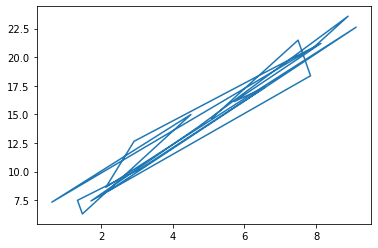

In [40]:
# 现行回归实现
x = torch.rand(20,1)*10
y = 2*x + (5 + torch.randn((20,1)))

lr = 10**-3

#构建线性回归的参数 需要求梯度
w = torch.rand((1),requires_grad=True)  
b = torch.zeros((1),requires_grad=True)

for iter in range(100):
  # 前向传播
  wx = torch.mul(w,x)
  y_pred = torch.add(wx,b)

  # 计算loss
  loss = (0.5 *(y-y_pred)**2).mean()

  # 反向传播
  loss.backward()

  # g更新参数 # 这种_的加法操作时从自身减，相当于-=
  b.data.sub_(lr * b.grad) 
  w.data.sub_(lr * w.grad)

  # 梯度清零
  w.grad.data.zero_()
  b.grad.data.zero_()
  
  # rint(w.data, b.data)
import matplotlib.pyplot as plt
plt.plot(x,y)
# plt.show(x,w.data*x+b.data)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!pip install transformers datasets accelerate 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

# 直接利用外部的数据集划分为训练集和验证集，不使用比赛的数据集进行预训练

df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/train.csv")
df['severe_toxic'] = df.severe_toxic * 2
# 进行标签相加
df['y'] = (df[['toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate']].sum(axis = 1)).astype(int)
df['y'] = df['y'] / df['y'].max()
df = df.rename(columns = {'comment_text':'exceprt'})
df = df[['exceprt','y']]
df.sample(5)
print(len(df))
df.to_csv(f'/content/sample_data/train.csv', index=False)
# df_train,df_test = train_test_split(df,test_size = 0.3,random_state=2)
# df_train.to_csv(f'/kaggle/working/train.csv', index=False)
# df_test.to_csv(f'/kaggle/working/test.csv', index=False)
train = pd.read_csv('/content/sample_data/train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/comments_to_score.csv')

mlm_data = train[['exceprt']]
mlm_data = mlm_data.rename(columns={'exceprt':'text'})
mlm_data.to_csv('mlm_data.csv', index=False)

mlm_data_val = test[['text']]
mlm_data_val = mlm_data_val.rename(columns={'text':'text'})
mlm_data_val.to_csv('mlm_data_val.csv', index=False)
import argparse
import logging
import math
import os
import random


import datasets
from datasets import load_dataset
from tqdm.auto import tqdm
from accelerate import Accelerator

import torch
from torch.utils.data import DataLoader

import transformers
from transformers import (
    CONFIG_MAPPING, 
    MODEL_MAPPING, 
    AdamW, 
    AutoConfig, 
    AutoModelForMaskedLM, 
    AutoTokenizer, 
    DataCollatorForLanguageModeling, 
    SchedulerType, 
    get_scheduler, 
    set_seed
)

# getlogger日志模块对象，日志输出，等级是从debug-critical从低到高，setlevel是设置日志输出等级
logger = logging.getLogger(__name__)

MODEL_CONFIG_CLASSES = list(MODEL_MAPPING.keys())
MODEL_TYPES = tuple(conf.model_type for conf in MODEL_CONFIG_CLASSES)

# from pprint import pprint
# pprint(MODEL_TYPES, width=3, compact=True)
class TrainConfig:
    train_file= 'mlm_data.csv'
    validation_file = 'mlm_data.csv'
    validation_split_percentage= 5
    pad_to_max_length= True
    model_name_or_path= 'roberta-base'
    config_name= 'roberta-base'
    tokenizer_name= 'roberta-base'
    use_slow_tokenizer= True
    per_device_train_batch_size= 4
    per_device_eval_batch_size= 4
    learning_rate= 5e-5
    weight_decay= 0.0
    num_train_epochs= 1 # change to 5
    max_train_steps= None
    gradient_accumulation_steps= 1
    lr_scheduler_type= 'constant_with_warmup'
    num_warmup_steps= 0
    output_dir= 'output'
    seed= 2021
    model_type= 'roberta'
    max_seq_length= None
    line_by_line= False
    preprocessing_num_workers= 4
    overwrite_cache= True
    mlm_probability= 0.15

config = TrainConfig()

if config.train_file is not None:
    # 拿到文件名的后缀，然后声明
    extension = config.train_file.split(".")[-1]
    assert extension in ["csv", "json", "txt"], "`train_file` should be a csv, json or txt file."
if config.validation_file is not None:
    extension = config.validation_file.split(".")[-1]
    assert extension in ["csv", "json", "txt"], "`validation_file` should be a csv, json or txt file."
if config.output_dir is not None:
    # 递归创建目录，第一个参数是path 
    os.makedirs(config.output_dir, exist_ok=True)
    def main():
    args = TrainConfig()
    accelerator = Accelerator()
    # 上面已经初始化了函数，logging.basicConfig函数中，可以指定日志的输出格式format，这个参数可以输出很多有用的信息
    logging.basicConfig(
        format="%(asctime)s - %(levelname)s - %(name)s -   %(message)s",
        datefmt="%m/%d/%Y %H:%M:%S",
        level=logging.INFO,
    )
    logger.info(accelerator.state)
    logger.setLevel(logging.INFO if accelerator.is_local_main_process else logging.ERROR)

    if accelerator.is_local_main_process:
        datasets.utils.logging.set_verbosity_warning()
        transformers.utils.logging.set_verbosity_info()
    else:
        datasets.utils.logging.set_verbosity_error()
        transformers.utils.logging.set_verbosity_error()
    if args.seed is not None:
        set_seed(args.seed)

    data_files = {}
    if args.train_file is not None:
        data_files["train"] = args.train_file
    if args.validation_file is not None:
        data_files["validation"] = args.validation_file
    extension = args.train_file.split(".")[-1]
    if extension == "txt":
        extension = "text"
    # 加载数据，训练和测试集，字典表示
    raw_datasets = load_dataset(extension, data_files=data_files)
    
    # 这部分是加载模型的判断
    if args.config_name:
    # transformers.AutoConfig 使用类方法 from_pretrained 加载模型配置，参数既可以为模型名称，也可以为具体文件。
        config = AutoConfig.from_pretrained(args.config_name)
    elif config.model_name_or_path:
        config = AutoConfig.from_pretrained(args.model_name_or_path)
    else:
        # 使用 CONFIG_MAPPING 是避免if-else语句过多，
        config = CONFIG_MAPPING[args.model_type]()
        logger.warning("You are instantiating a new config instance from scratch.")

    if args.tokenizer_name:
        tokenizer = AutoTokenizer.from_pretrained(args.tokenizer_name, use_fast=not args.use_slow_tokenizer)
    elif args.model_name_or_path:
        tokenizer = AutoTokenizer.from_pretrained(args.model_name_or_path, use_fast=not args.use_slow_tokenizer)
    else:
        raise ValueError(
            "You are instantiating a new tokenizer from scratch. This is not supported by this script."
            "You can do it from another script, save it, and load it from here, using --tokenizer_name."
        )
    
    if args.model_name_or_path:
        #  ForMaskedLM  看一下MLM这些模型，屏蔽语言模型
        model = AutoModelForMaskedLM.from_pretrained(
            
            args.model_name_or_path,
            from_tf=bool(".ckpt" in args.model_name_or_path),
            config=config,
        )
    else:
        logger.info("Training new model from scratch")
        model = AutoModelForMaskedLM.from_config(config)
    
    # new_tokens = ['COVID', 'hospitalization']  num_added_toks = tokenizer.add_tokens(new_tokens)
    # 在模型中添加自己文件中的token，通过model.resize_token_embeddings方法，随机初始化了一个权重，
    # 保存添加后的词汇：tokenizer.savepretrained  再次加载模型就会自动读取增加后的词汇。
    model.resize_token_embeddings(len(tokenizer))

    column_names = raw_datasets["train"].column_names
    
    text_column_name = "text" if "text" in column_names else column_names[0]

    if args.max_seq_length is None:
        max_seq_length = tokenizer.model_max_length
        if max_seq_length > 1024:
            logger.warning(
                f"The tokenizer picked seems to have a very large `model_max_length` ({tokenizer.model_max_length}). "
                "Picking 1024 instead. You can change that default value by passing --max_seq_length xxx."
            )
            max_seq_length = 1024
    else:
        if args.max_seq_length > tokenizer.model_max_length:
            logger.warning(
                f"The max_seq_length passed ({args.max_seq_length}) is larger than the maximum length for the"
                f"model ({tokenizer.model_max_length}). Using max_seq_length={tokenizer.model_max_length}."
            )
        max_seq_length = min(args.max_seq_length, tokenizer.model_max_length)

    def tokenize_function(examples):
        # 对新的任务进行 分词，
        return tokenizer(examples[text_column_name], return_special_tokens_mask=True)
    
    # 得到分词之后的数据集，经过分词之后返回的是带有 input_ids、attention_mask 和 token_type_ids的字典格式
    # 使用Dataset.map方法，可以使数据仍返回数据集的格式，而不是字典的形式，这样可以继续对数据集进行预处理，而不是直接得到向量化的结果
    # 分词器处理成对的句子列表，如前所述。 这将允许我们在调用 map 时使用选项 batched=True，这将大大加快向量化 实现批量化的分词
    tokenized_datasets = raw_datasets.map(
        tokenize_function,
        batched=True,
        num_proc=args.preprocessing_num_workers,
        remove_columns=column_names,
        load_from_cache_file=not args.overwrite_cache,
    )

    # 重新进行数据预处理的过程
    def group_texts(examples):
        concatenated_examples = {k: sum(examples[k], []) for k in examples.keys()}
        total_length = len(concatenated_examples[list(examples.keys())[0]])
        total_length = (total_length // max_seq_length) * max_seq_length
        result = {
            k: [t[i : i + max_seq_length] for i in range(0, total_length, max_seq_length)]
            for k, t in concatenated_examples.items()
        }
        return result

    tokenized_datasets = tokenized_datasets.map(
        group_texts,
        batched=True,
        num_proc=args.preprocessing_num_workers,
        load_from_cache_file=not args.overwrite_cache,
    )
    # 对我们想要一起批处理的数据集的项目应用正确的填充量，动态填充 DataCollatorWithPadding、
    # 在划分batch的时候再进行padding
    train_dataset = tokenized_datasets["train"]
    eval_dataset = tokenized_datasets["validation"]

    
    # bert的预训练模式一般分为，Masked language model (MLM)与 next sentence prediction(NSP)，主要利用MLM在自己的语料上进行预训练
    # 预训练的模式为MLM，直接调用 DataCollatorForLanguageModeling API即可方便得以自己的语料定义生成器
    data_collator = DataCollatorForLanguageModeling(tokenizer=tokenizer, mlm_probability=args.mlm_probability)
    
    # Dataset是一个包装类，用来将数据包装为Dataset类，然后传入DataLoader中，我们再使用DataLoader这个类来更加快捷的对数据进行操作。
    # DataLoader是一个比较重要的类，它为我们提供的常用操作有：batch_size(每个batch的大小), 
    # shuffle(是否进行shuffle操作), num_workers(加载数据的时候使用几个子进程)
    train_dataloader = DataLoader(
        train_dataset, shuffle=True, collate_fn=data_collator, batch_size=args.per_device_train_batch_size
    )
    eval_dataloader = DataLoader(eval_dataset, collate_fn=data_collator, batch_size=args.per_device_eval_batch_size)

    
    no_decay = ["bias", "LayerNorm.weight"]
    optimizer_grouped_parameters = [
        {
            "params": [p for n, p in model.named_parameters() if not any(nd in n for nd in no_decay)],
            "weight_decay": args.weight_decay,
        },
        {
            "params": [p for n, p in model.named_parameters() if any(nd in n for nd in no_decay)],
            "weight_decay": 0.0,
        },
    ]
    optimizer = AdamW(optimizer_grouped_parameters, lr=args.learning_rate)

    model, optimizer, train_dataloader, eval_dataloader = accelerator.prepare(
        model, optimizer, train_dataloader, eval_dataloader
    )

    num_update_steps_per_epoch = math.ceil(len(train_dataloader) / args.gradient_accumulation_steps)
    if args.max_train_steps is None:
        args.max_train_steps = args.num_train_epochs * num_update_steps_per_epoch
    else:
        # 向上取整
        args.num_train_epochs = math.ceil(args.max_train_steps / num_update_steps_per_epoch)

    lr_scheduler = get_scheduler(
        name=args.lr_scheduler_type,
        optimizer=optimizer,
        num_warmup_steps=args.num_warmup_steps,
        num_training_steps=args.max_train_steps,
    )

    total_batch_size = args.per_device_train_batch_size * accelerator.num_processes * args.gradient_accumulation_steps

    logger.info("***** Running training *****")
    logger.info(f"  Num examples = {len(train_dataset)}")
    logger.info(f"  Num Epochs = {args.num_train_epochs}")
    logger.info(f"  Instantaneous batch size per device = {args.per_device_train_batch_size}")
    logger.info(f"  Total train batch size (w. parallel, distributed & accumulation) = {total_batch_size}")
    logger.info(f"  Gradient Accumulation steps = {args.gradient_accumulation_steps}")
    logger.info(f"  Total optimization steps = {args.max_train_steps}")
    # Only show the progress bar once on each machine.
    progress_bar = tqdm(range(args.max_train_steps), disable=not accelerator.is_local_main_process)
    completed_steps = 0

    for epoch in range(args.num_train_epochs):
        model.train()
        for step, batch in enumerate(train_dataloader):
            outputs = model(**batch)
            loss = outputs.loss
            loss = loss / args.gradient_accumulation_steps
            accelerator.backward(loss)
            if step % args.gradient_accumulation_steps == 0 or step == len(train_dataloader) - 1:
                optimizer.step()
                lr_scheduler.step()
                optimizer.zero_grad()
                progress_bar.update(1)
                completed_steps += 1

            if completed_steps >= args.max_train_steps:
                break

        model.eval()
        losses = []
        for step, batch in enumerate(eval_dataloader):
            with torch.no_grad():
                outputs = model(**batch)

            loss = outputs.loss
            losses.append(accelerator.gather(loss.repeat(args.per_device_eval_batch_size)))

        losses = torch.cat(losses)
        losses = losses[: len(eval_dataset)]
        perplexity = math.exp(torch.mean(losses))

        logger.info(f"epoch {epoch}: perplexity: {perplexity}")

    if args.output_dir is not None:
        accelerator.wait_for_everyone()
        unwrapped_model = accelerator.unwrap_model(model)
        unwrapped_model.save_pretrained(args.output_dir, save_function=accelerator.save)
if __name__ == "__main__":
    main()      

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
